In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer as ct
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

In [2]:
heart_complete = pd.read_csv('heart-complete.csv')
heart_test = pd.read_csv('heart-test.csv')
heart_train = pd.read_csv('heart-train.csv')


In [3]:
# 1.1

column_types = heart_train.dtypes

nominal_columns = {}
categorical_columns = {}
continuous_columns = {}

for column in column_types.index:
    if column_types[column] == 'object':
        # If the column data type is 'object', it's considered nominal or categorical.
        nominal_columns[column] = 'Nominal/Categorical'
    elif column_types[column] in ['int64', 'float64']:
        # If the column data type is 'int64' or 'float64', it's considered continuous.
        continuous_columns[column] = 'Continuous'

print("Nominal/Categorical Columns:")
print(nominal_columns)
print("\nContinuous Columns:")
print(continuous_columns)

Nominal/Categorical Columns:
{'famhist': 'Nominal/Categorical'}

Continuous Columns:
{'sbp': 'Continuous', 'tobacco': 'Continuous', 'ldl': 'Continuous', 'adiposity': 'Continuous', 'typea': 'Continuous', 'obesity': 'Continuous', 'alcohol': 'Continuous', 'age': 'Continuous', 'chd': 'Continuous'}


In [4]:
# 1.2
heart_test.describe()

,ID,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,72.00000,134.013986,3.665594,4.663916,23.729930,54.706294,25.778951,17.553077,39.608392
std,41.42463,18.468087,4.426044,2.288188,7.762301,9.352888,4.455007,25.933270,14.865612
min,1.00000,103.000000,0.000000,1.070000,6.740000,30.000000,17.750000,0.000000,15.000000
25%,36.50000,122.000000,0.065000,3.080000,17.420000,48.000000,22.600000,0.595000,28.000000
50%,72.00000,130.000000,1.910000,4.190000,24.060000,54.000000,25.380000,6.510000,40.000000
75%,107.50000,141.000000,5.995000,5.780000,29.265000,61.500000,28.220000,24.325000,53.000000
max,143.00000,208.000000,27.400000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [5]:
# 1.2
heart_test.head()

,ID,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1,114,4.08,4.59,14.60,Present,62,23.11,6.72,58
1,2,114,0.00,3.83,19.40,Present,49,24.86,2.49,29
2,3,132,0.00,5.80,30.96,Present,69,30.11,0.00,53
3,4,206,6.00,2.95,32.27,Absent,72,26.81,56.06,60
4,5,134,14.10,4.44,22.39,Present,65,23.09,0.00,40


In [6]:
# 1.2
heart_train.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [7]:
# 1.3
heart_complete.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [8]:
# 1.3
heart_test.isna().sum()

ID           0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

In [9]:
# 1.3
heart_train.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

no null values found in this dataset

In [10]:
# 4.A
heart_train['age'].max()

64

In [11]:
# 4.B
heart_train['age'].min()

15

In [12]:
# 4.C
heart_train['age'].mean()

42.68689320388349

In [13]:
# 4.D
heart_train['age'].median()

45.0

In [14]:
# 4.I
heart_train.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [15]:
# 4.I
heart_train.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [16]:
# 4.I
heart_complete.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

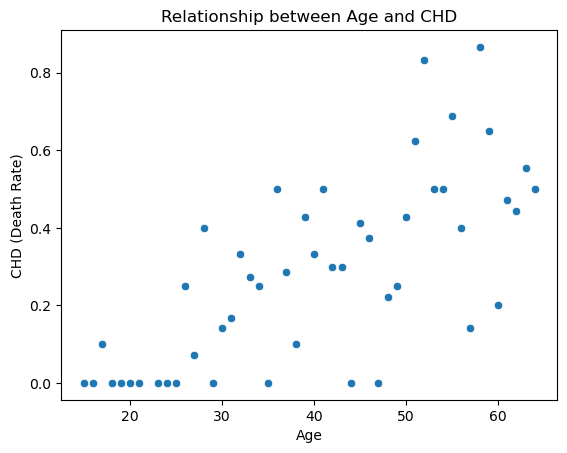

In [17]:
# E
chd_age = heart_train.groupby('age')['chd'].mean().reset_index()
sns.scatterplot(x='age', y='chd', data=chd_age)
plt.xlabel('Age')
plt.ylabel('CHD (Death Rate)')
plt.title('Relationship between Age and CHD')
plt.show()

In [18]:
correlation = chd_age['age'].corr(chd_age['chd'])
print("Pearson Correlation Coefficient:", correlation)


Pearson Correlation Coefficient: 0.7109320891751592


In [19]:
# F: Find the age groups whose survival rate is the largest

age_survival_rate = heart_train.groupby('age')['chd'].value_counts(normalize=True).unstack()
age_survival_rate.rename(columns={'chd': 'Survival Rate'}, inplace=True)
age_survival_rate = age_survival_rate[0]


max_survival_rate = age_survival_rate.idxmax()

print("Age group(s) with the largest survival rate:")
print(age_survival_rate)



Age group(s) with the largest survival rate:
age
15    1.000000
16    1.000000
17    0.900000
18    1.000000
19    1.000000
20    1.000000
21    1.000000
23    1.000000
24    1.000000
25    1.000000
26    0.750000
27    0.928571
28    0.600000
29    1.000000
30    0.857143
31    0.833333
32    0.666667
33    0.727273
34    0.750000
35    1.000000
36    0.500000
37    0.714286
38    0.900000
39    0.571429
40    0.666667
41    0.500000
42    0.700000
43    0.700000
44    1.000000
45    0.588235
46    0.625000
47    1.000000
48    0.777778
49    0.750000
50    0.571429
51    0.375000
52    0.166667
53    0.500000
54    0.500000
55    0.312500
56    0.600000
57    0.857143
58    0.133333
59    0.350000
60    0.800000
61    0.529412
62    0.555556
63    0.444444
64    0.500000
Name: 0, dtype: float64


In [20]:
# G

age_chd_correlation = heart_train['age'].corr(heart_train['chd'])
print("Correlation between Age and CHD:", age_chd_correlation)

tobacco_chd_correlation = heart_train['tobacco'].corr(heart_train['chd'])
print("Correlation between Tobacco and CHD:", tobacco_chd_correlation)

ldl_chd_correlation = heart_train['ldl'].corr(heart_train['chd'])
print("Correlation between LDL and CHD:", ldl_chd_correlation)

alcohol_chd_correlation = heart_train['alcohol'].corr(heart_train['chd'])
print("Correlation between Alcohol and CHD:", alcohol_chd_correlation)

adiposity_chd_correlation = heart_train['adiposity'].corr(heart_train['chd'])
print("Correlation between Adiposity and CHD:", adiposity_chd_correlation)




Correlation between Age and CHD: 0.3736374032927482
Correlation between Tobacco and CHD: 0.29277218645205527
Correlation between LDL and CHD: 0.27249580056484085
Correlation between Alcohol and CHD: 0.013458887544412827
Correlation between Adiposity and CHD: 0.252710064325548


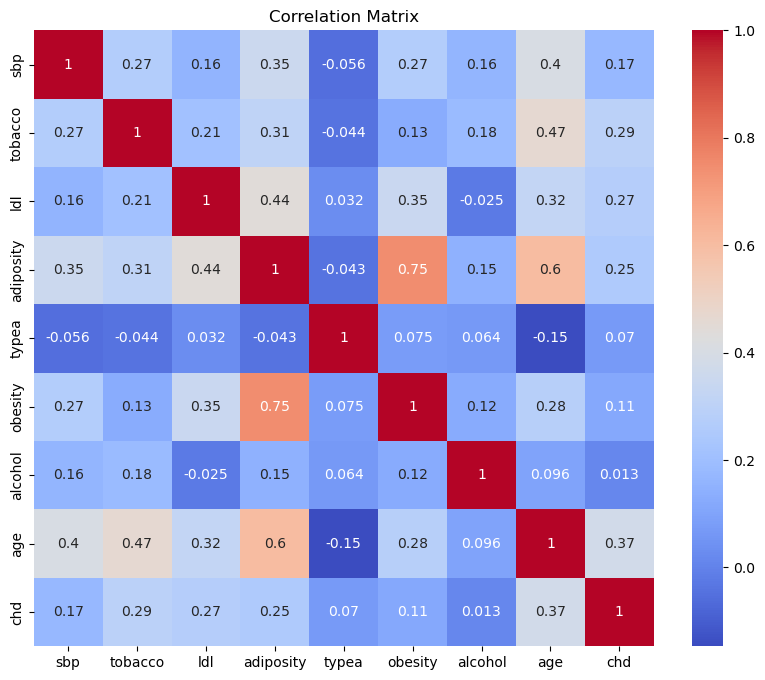

In [21]:
# H.1

plt.figure(figsize=(10, 8))
sns.heatmap(heart_train.drop('famhist', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='tobacco', ylabel='age'>,
        <Axes: xlabel='ldl', ylabel='age'>,
        <Axes: xlabel='adiposity', ylabel='age'>,
        <Axes: xlabel='chd', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='tobacco'>,
        <Axes: xlabel='tobacco', ylabel='tobacco'>,
        <Axes: xlabel='ldl', ylabel='tobacco'>,
        <Axes: xlabel='adiposity', ylabel='tobacco'>,
        <Axes: xlabel='chd', ylabel='tobacco'>],
       [<Axes: xlabel='age', ylabel='ldl'>,
        <Axes: xlabel='tobacco', ylabel='ldl'>,
        <Axes: xlabel='ldl', ylabel='ldl'>,
        <Axes: xlabel='adiposity', ylabel='ldl'>,
        <Axes: xlabel='chd', ylabel='ldl'>],
       [<Axes: xlabel='age', ylabel='adiposity'>,
        <Axes: xlabel='tobacco', ylabel='adiposity'>,
        <Axes: xlabel='ldl', ylabel='adiposity'>,
        <Axes: xlabel='adiposity', ylabel='adiposity'>,
        <Axes: xlabel='chd', ylabel='adiposity'>],
       [<Axes: xlabel='age

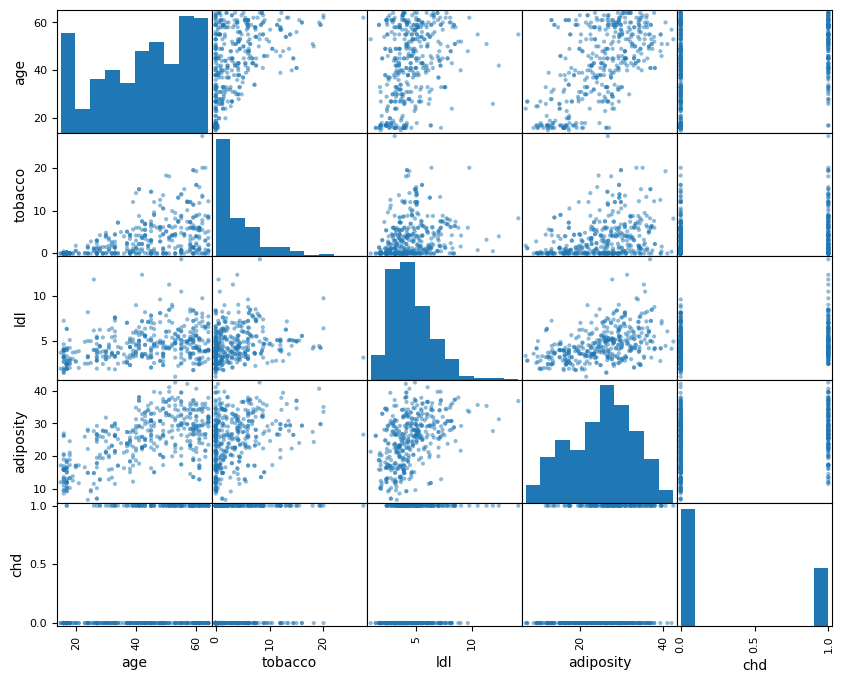

In [22]:
#  H.2

selected_columns = ['age', 'tobacco', 'ldl', 'adiposity', 'chd']


scatter_matrix(heart_train[selected_columns], figsize=(10, 8))

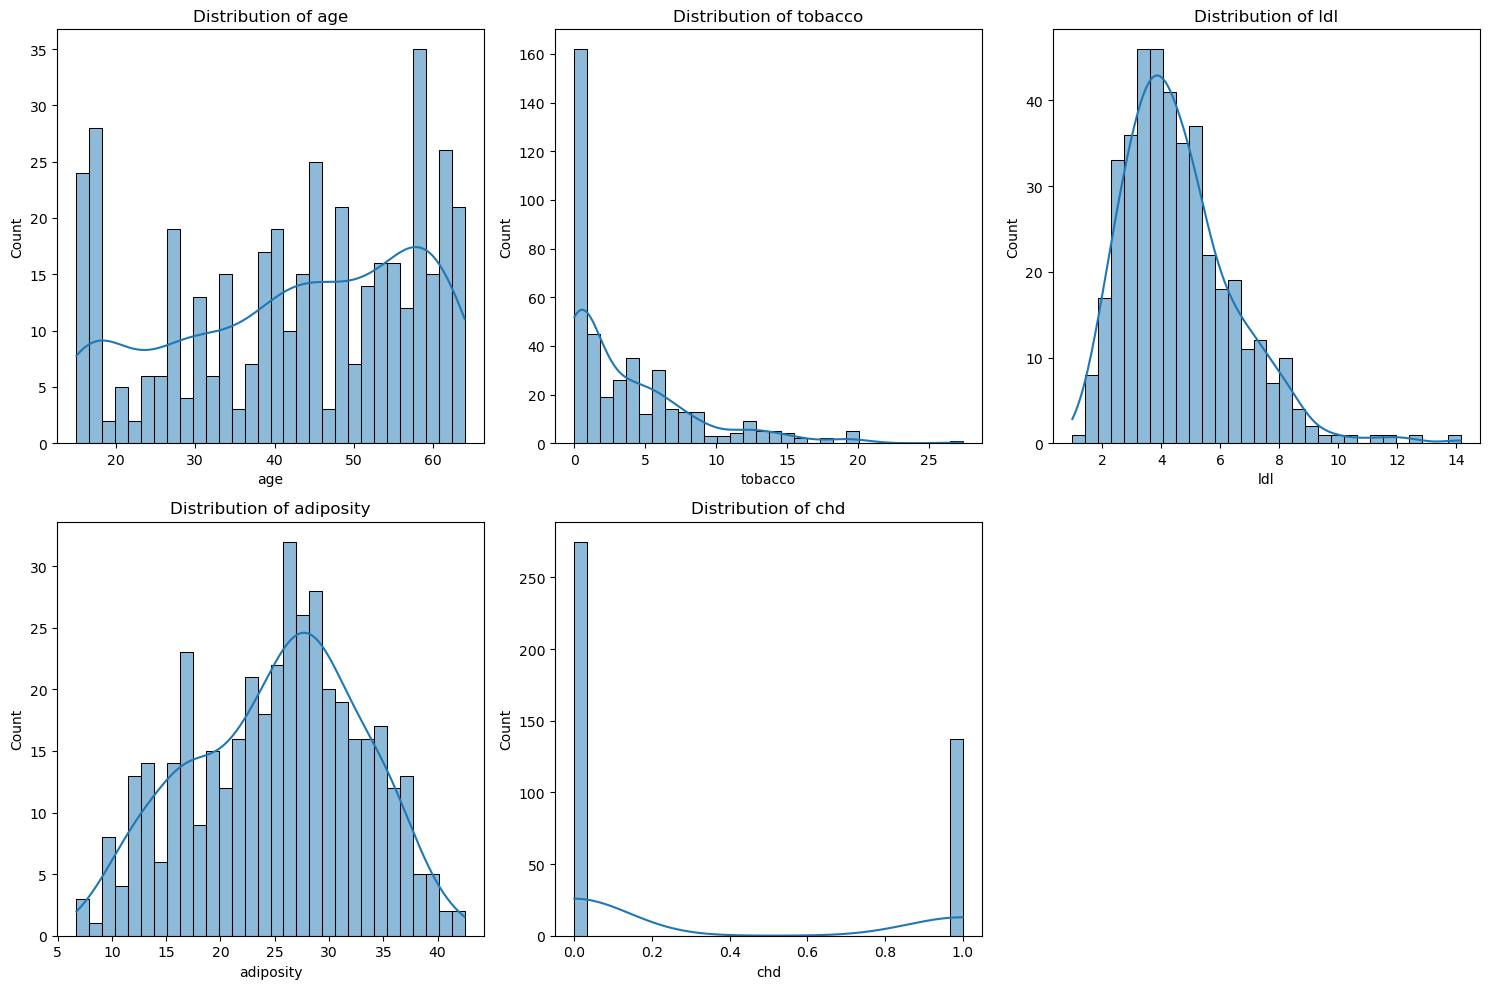

In [23]:
# H.3

plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(heart_train[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [52]:
# L

heart_train['famhist'] = heart_train['famhist'].replace({'Present': 1, 'Absent': 0})

X = pd.get_dummies(heart_train.drop('chd', axis=1), drop_first=True)
y = heart_train['chd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression().fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
score = logistic_model.score(X_train, y_train)
test_score = logistic_model.score(X_test, y_test)
mse_score = mean_squared_error(y_test, y_pred, squared=True)

pred_df = pd.DataFrame({'ID': y_test, 'chd': y_pred})
pred_df.to_csv("result.csv", index=True)


print("Train: ", score)
print("Test: ", test_score)
print("MSE: ", mse_score)




Train:  0.7720364741641338
Test:  0.6746987951807228
MSE:  0.3253012048192771


In [54]:
# J

print(heart_train.isnull().sum())

# There are no missing values



sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [25]:
# 1.K
scaler = StandardScaler()

# Fit and transform the numeric columns in your DataFrame (excluding any target variables)
numeric_columns = heart_train.select_dtypes(include='number').drop(columns=['chd'])
heart_train[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

print(heart_train)

          sbp   tobacco       ldl  adiposity   famhist     typea   obesity  \
0   -0.256537  2.201131 -0.579093   0.340015  1.175374  0.820793  0.046087   
1   -0.354446  0.561429  0.999471   1.430374  1.175374  1.029537  1.218579   
2    0.135101  0.085029 -0.642874  -1.157775 -0.850793  0.716420 -1.224521   
3   -1.235630  0.091677  0.000245  -1.364723  1.175374  1.029537 -0.660351   
4   -1.235630 -0.812375 -0.403697  -0.743878  1.175374 -0.327304 -0.231092   
..        ...       ...       ...        ...       ...       ...       ...   
407  0.330919 -0.014682 -0.573778  -0.320927 -0.850793 -0.118559 -0.861490   
408  3.268198 -0.812375 -0.222986   1.044933 -0.850793  1.760144  0.382136   
409 -0.256537 -0.147631 -0.754489  -0.936599 -0.850793 -1.788517  0.139298   
410  0.428829  2.511345  0.207531   1.524794  1.175374  2.073261  1.478588   
411 -0.648174 -0.765843 -0.339917  -1.298759 -0.850793  0.925165 -0.890925   

      alcohol       age  chd  
0    1.555708  0.417783    1  
1

In [55]:
# Part 2

price_df = pd.read_csv('Price.csv')

price_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [27]:
# 2.2

types = price_df.dtypes

numerical_columns = price_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = price_df.select_dtypes(include=['object']).columns


print("Numerical Variables:")
print(numerical_columns)

print("\nCategorical Variables:")
print(categorical_columns)

Numerical Variables:
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

Categorical Variables:
Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')


In [28]:
# 2.3

summary_stats = price_df.describe()
print(summary_stats)


              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

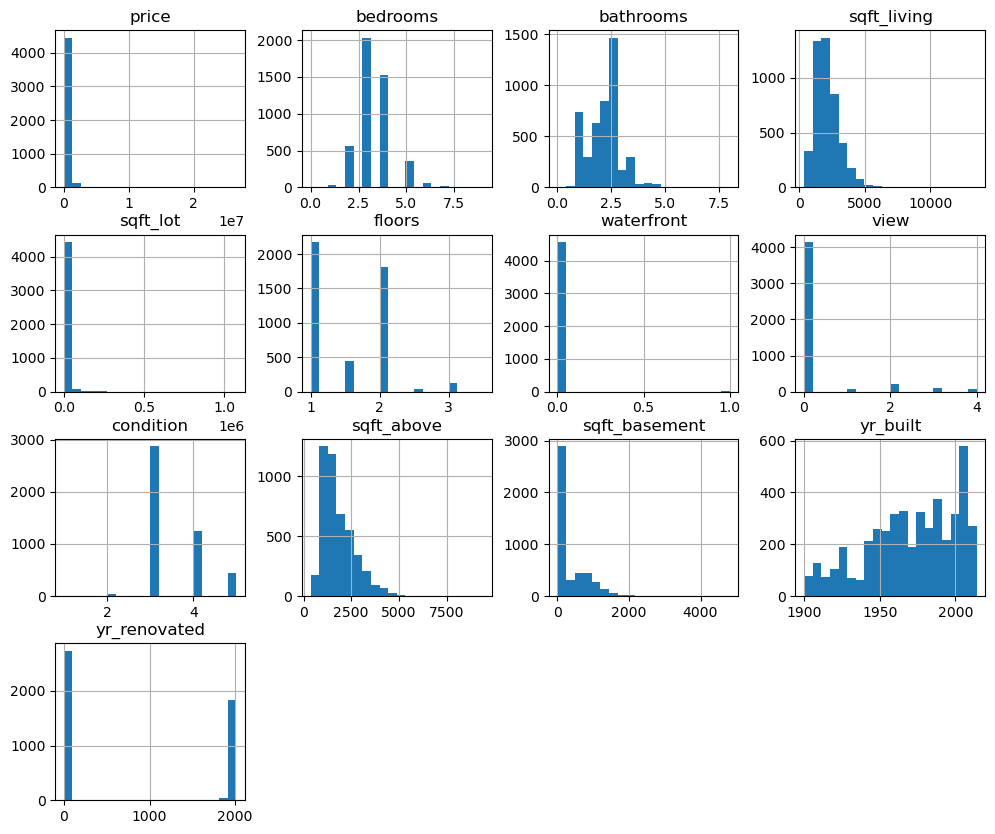

In [29]:
price_df[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.show()


In [30]:
categorical_counts = price_df[categorical_columns].apply(lambda x: x.value_counts())
print(categorical_counts)


                 date  street   city  statezip  country
1 View Ln NE      NaN     1.0    NaN       NaN      NaN
10 W Etruria St   NaN     1.0    NaN       NaN      NaN
100 20th Ave E    NaN     1.0    NaN       NaN      NaN
100 24th Ave E    NaN     1.0    NaN       NaN      NaN
100 Mt Si Pl NW   NaN     1.0    NaN       NaN      NaN
...               ...     ...    ...       ...      ...
WA 98199          NaN     NaN    NaN      68.0      NaN
WA 98288          NaN     NaN    NaN       3.0      NaN
WA 98354          NaN     NaN    NaN       2.0      NaN
Woodinville       NaN     NaN  115.0       NaN      NaN
Yarrow Point      NaN     NaN    4.0       NaN      NaN

[4717 rows x 5 columns]


In [31]:
correlation_matrix = price_df[numerical_columns].corr()
print(correlation_matrix)


                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

In [32]:
correlation_matrix = price_df[numerical_columns].corr()
print(correlation_matrix)


                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

In [33]:
# 2.4

missing_values = price_df.isnull().sum()
print("Number of missing values for each column:")
print(missing_values)



Number of missing values for each column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [34]:
# 2.5

numerical_summary = price_df.describe()
print("Summary statistics for numerical columns:")
print(numerical_summary)


Summary statistics for numerical columns:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.7784

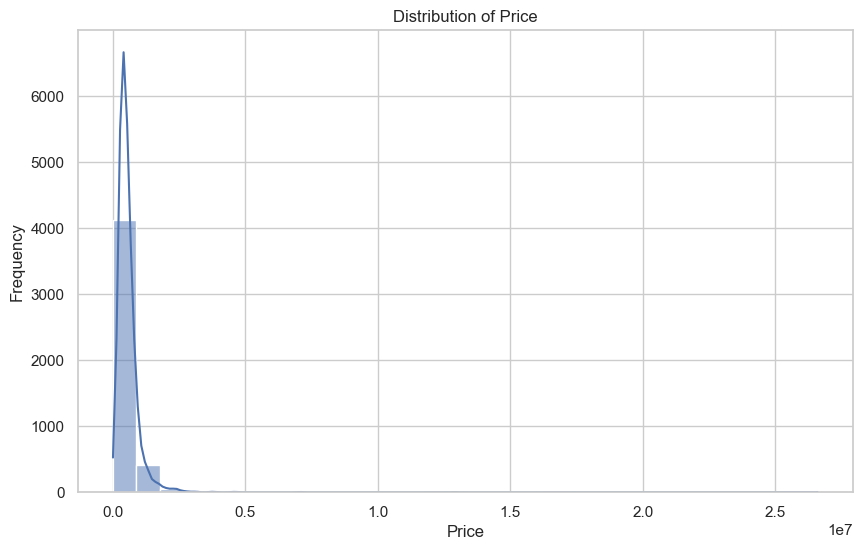

In [35]:
# 2.6

sns.set(style="whitegrid")

# Create a histogram for the "price" column
plt.figure(figsize=(10, 6))
sns.histplot(price_df['price'], bins=30, kde=True)  # Adjust the number of bins as needed
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [36]:
# 2.7

# Observe the histogram, Does it look like it falls under any probability distribution? Does
# it look like a bell curve?

In [37]:
# 2.8

price_data = price_df['price']

# Perform the Shapiro-Wilk test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(price_data)

# Check the p-value
alpha = 0.05
if shapiro_p_value > alpha:
    print("The 'price' feature follows a normal distribution (p-value =", shapiro_p_value, ")")
else:
    print("The 'price' feature does not follow a normal distribution (p-value =", shapiro_p_value, ")")

The 'price' feature does not follow a normal distribution (p-value = 0.0 )


In [38]:
# 2.9

before_1990 = price_df[price_df['yr_built'] < 1990]['price']
after_1990 = price_df[price_df['yr_built'] >= 1990]['price']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(before_1990, after_1990)

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value to the alpha level
if p_value < alpha:
    print("Reject the null hypothesis: The year built has a significant impact on sale price.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of the year built on sale price.")


Reject the null hypothesis: The year built has a significant impact on sale price.


In [39]:
# 2.10

groupA = price_df[price_df['yr_built'] == 1990]['price']
groupB = price_df[price_df['yr_built'] == 2000]['price']
groupC = price_df[price_df['yr_built'] == 2010]['price']

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(groupA, groupB, groupC)

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value to the alpha level
if p_value < alpha:
    print("Reject the null hypothesis: The year built has a significant impact on sale price.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of the year built on sale price.")


Reject the null hypothesis: The year built has a significant impact on sale price.


In [40]:
# 2.11

# Does the ANOVA conclusion change from teh t-test or is it the same?


In [41]:
# 2.12

numerical_features = price_df.select_dtypes(include=['int64', 'float64'])

# Calculate the covariance matrix
covariance_matrix = np.cov(numerical_features, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix of Numerical Features:")
print(covariance_matrix)


Covariance Matrix of Numerical Features:
[[ 3.17909572e+11  1.02660350e+05  1.44557386e+05  2.33751159e+08
   1.02077552e+09  4.59692113e+04  6.45547323e+03  1.00288560e+05
   1.33319640e+04  1.78683225e+08  5.50679344e+07  3.66404580e+05
  -1.58896099e+07]
 [ 1.02660350e+05  8.26004897e-01  3.88879482e-01  5.20766735e+02
   2.24444017e+03  8.70301672e-02 -2.67165830e-04  7.85469431e-02
   1.54366261e-02  3.79805727e+02  1.40961008e+02  3.84954442e+00
  -5.43710879e+01]
 [ 1.44557386e+05  3.88879482e-01  6.14312773e-01  5.74627928e+02
   3.03298755e+03  2.05223909e-01  5.04307411e-03  1.29316711e-01
  -6.36929815e-02  4.66213556e+02  1.08414371e+02  1.08010070e+01
  -1.65724334e+02]
 [ 2.33751159e+08  5.20766735e+02  5.74627928e+02  9.27767563e+05
   7.27707999e+06  1.78799031e+02  9.56198096e+00  2.33183935e+02
  -4.09821647e+01  7.27839770e+05  1.99927792e+05  8.24128442e+03
  -1.15862844e+05]
 [ 1.02077552e+09  2.24444017e+03  3.03298755e+03  7.27707999e+06
   1.28769276e+09  7.2430

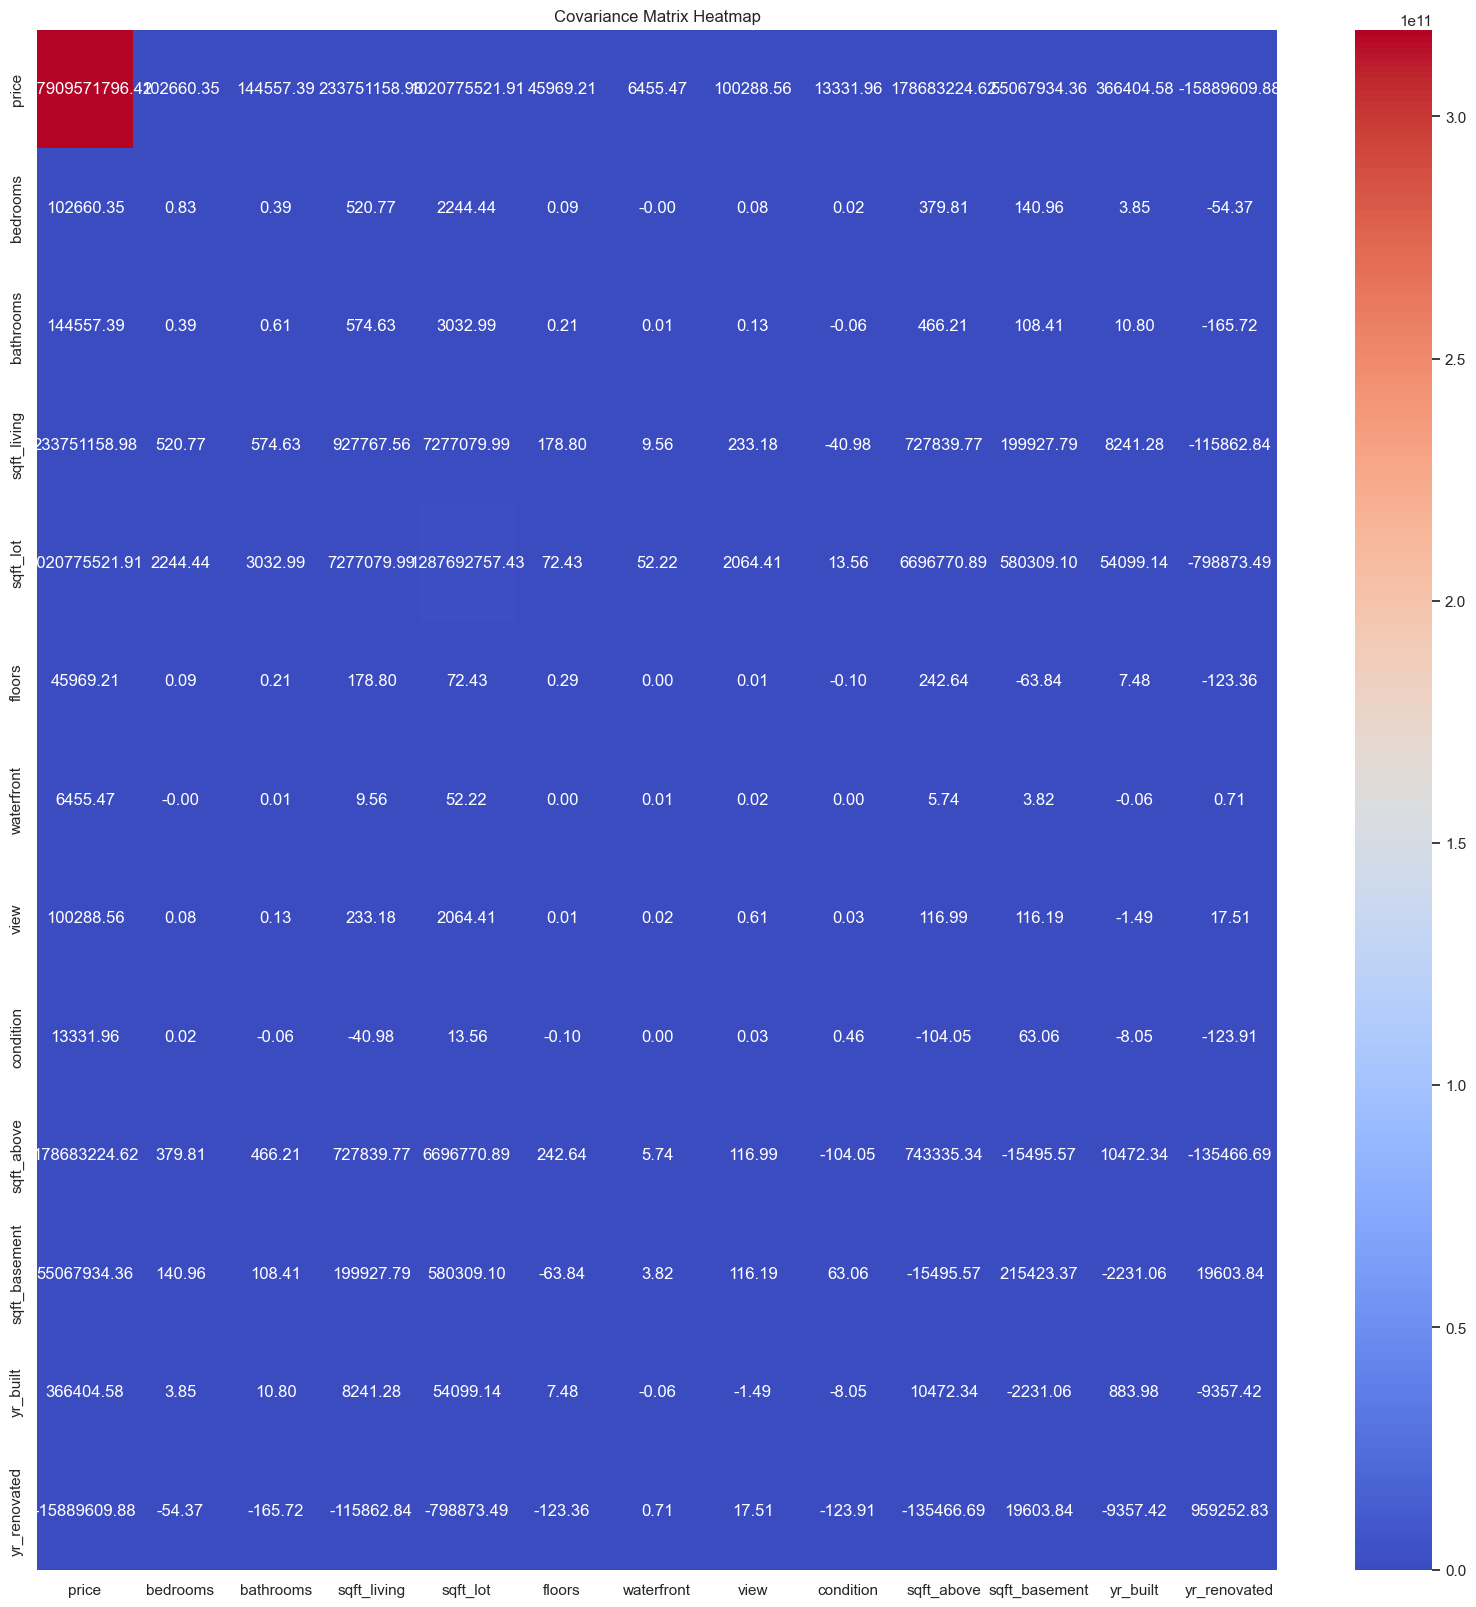

In [42]:
# 2.13

plt.figure(figsize=(20, 20))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=numerical_features.columns, yticklabels=numerical_features.columns)
plt.title("Covariance Matrix Heatmap")
plt.show()


The colors in the heatmap represent the following:

Positive Covariance (Light Colors): Positive covariances indicate that the two variables tend to move in the same direction. In the heatmap, you will see light colors (e.g., shades of yellow or pink) for positive covariances.

Negative Covariance (Dark Colors): Negative covariances suggest that the two variables tend to move in opposite directions. In the heatmap, you will see dark colors (e.g., shades of blue or purple) for negative covariances.

Strength of Covariance: The intensity of the color indicates the strength of the covariance. Stronger covariances will have more saturated colors.

In [43]:
# 2.14

covariance_matrix = np.cov(numerical_features, rowvar=False)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Calculate the rank of the covariance matrix
rank = np.linalg.matrix_rank(covariance_matrix)

# Print the results
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

print("\nRank of the Covariance Matrix:", rank)

Eigenvalues:
[3.17913145e+11 1.28446478e+09 1.31108057e+06 8.93134507e+05
 2.96182598e+05 6.50782442e+02 5.84849793e-01 4.71240323e-01
 3.29071200e-01 2.33658680e-01 1.27738313e-01 6.13485190e-03
 1.15948954e-11]

Eigenvectors:
[[ 9.99994359e-01 -3.23035786e-03 -8.51596811e-04 -3.31278978e-04
   1.12866961e-04 -5.91081399e-06 -1.71362131e-07  5.41664646e-08
  -2.44755587e-08 -7.55431120e-08 -2.40552600e-09  8.71000627e-09
  -4.70650040e-15]
 [ 3.22942387e-07  1.49266766e-06  3.91643641e-04  2.02274365e-04
  -3.14760225e-04  4.68120278e-04 -7.72572312e-01 -5.78876646e-01
  -8.93143527e-02 -2.29457271e-01 -8.58296884e-02 -6.23757777e-03
  -4.13348579e-08]
 [ 4.54737600e-07  2.00176882e-06  4.61433392e-04  1.09888047e-04
  -1.54417958e-04 -7.06651255e-03 -1.35585000e-01 -1.90062165e-01
  -1.26186312e-01  7.66160721e-01  5.85249289e-01  9.67196721e-04
   1.40651406e-08]
 [ 7.35340568e-04  5.08389398e-03  6.75592283e-01  3.22262450e-01
  -3.26122959e-01  2.38598818e-03  2.57073602e-04  4.99

The eigenvectors obtained from the covariance matrix can provide valuable information about the relationships between the numerical features in your dataset. Each eigenvector corresponds to a principal component of the data, and the eigenvalues associated with the eigenvectors represent the amount of variance explained by each principal component. Here's an interpretation of the eigenvectors and their significance:

1. **Eigenvector Significance**: Each eigenvector represents a linear combination of the original features, and its magnitude (absolute value) indicates the significance of each feature's contribution to that component. Larger magnitude values indicate a stronger influence.

2. **Principal Components**: The eigenvectors are the directions (in feature space) along which the data varies the most. The first eigenvector (associated with the largest eigenvalue) corresponds to the principal component that explains the most variance in the data, and subsequent eigenvectors explain decreasing amounts of variance.

3. **Eigenvalues and Variance Explained**: The eigenvalues associated with the eigenvectors indicate the amount of variance explained by each principal component. Larger eigenvalues imply that the corresponding principal component explains a larger portion of the total variance in the data.

4. **Reduced Dimensionality**: Principal components can be used for dimensionality reduction. You can select a subset of the principal components to represent the data while retaining most of the variance. This can be useful for reducing data complexity.

5. **Interpreting Feature Influence**: By examining the magnitude and sign of the coefficients in the eigenvectors, you can gain insights into which features are positively or negatively correlated with a particular principal component. This information can help identify patterns and relationships in the data.

In your specific output, you have 13 eigenvectors, but it's essential to focus on the first few eigenvectors (e.g., the first two or three) with the largest eigenvalues. These principal components are the most significant in explaining the variance in your dataset. The sign and magnitude of the coefficients in these eigenvectors can provide insights into which features contribute most to the variance along those principal components.

Overall, eigenvectors and eigenvalues are fundamental in dimensionality reduction techniques like Principal Component Analysis (PCA) and can be used to understand the underlying structure and relationships in your data.

In [44]:
# 2.16

covariance_matrix_inverse = np.linalg.inv(covariance_matrix)

# Print the inverse covariance matrix
print("Inverse Covariance Matrix:")
print(covariance_matrix_inverse)

Inverse Covariance Matrix:
[[ 4.02141066e-12  2.33410076e-07 -2.30022634e-07 -1.69956123e-09
   2.77979084e-12 -1.60085132e-07 -1.42898246e-06 -1.83773134e-07
  -1.28056491e-07  6.27179722e-10  7.21515458e-10  9.56375963e-09
  -2.64315884e-11]
 [ 2.33410076e-07  2.04523258e+00 -6.99779967e-01  5.10229797e-04
   2.40928235e-06  1.38457162e-01  1.01201095e+00  1.98099815e-01
  -1.48232089e-01  1.02045959e-03 -2.62324338e-03  4.26866088e-03
  -6.54008976e-05]
 [-2.30022634e-07 -6.99779967e-01  5.35024413e+00 -1.93745608e-03
   2.24562713e-06 -1.72051984e+00 -1.48096924e-01 -7.26987962e-02
  -1.67390565e-01 -3.87491217e-03 -1.93745608e-03 -3.24484850e-02
   1.05411176e-04]
 [-9.80969855e-10 -6.61141986e-04 -3.21016130e-04 -2.04370191e+09
   7.69356264e-09  3.82156042e-04 -3.84016032e-03  1.08874082e-04
  -2.91889750e-06  2.04370191e+09  2.04370191e+09 -5.15870883e-06
   1.03993572e-07]
 [ 2.77979084e-12  2.40928235e-06  2.24562713e-06 -1.93059724e-09
   8.36481320e-10  7.33468811e-06  5.28

2.17

The rank of a matrix, in the context of a linear regression problem, can have a significant impact on the feasibility and success of solving the regression problem using a set of features (independent variables). Let's discuss the impact of matrix rank in the context of linear regression:

1. **Full Rank Matrix (Rank = Number of Features):**
   - When the matrix of independent variables (features) is full rank, it means that the features are linearly independent, and there are no multicollinearity issues. Each feature provides unique information to the regression model.
   - In this case, you can accurately estimate the coefficients of the linear regression model using methods like Ordinary Least Squares (OLS).
   - The solution is unique, and it is feasible to obtain the best-fitting model.

2. **Less Than Full Rank Matrix (Rank < Number of Features):**
   - When the matrix is not full rank, it indicates linear dependence among some of the features, known as multicollinearity. This can happen when two or more features are highly correlated, making it challenging to distinguish their individual effects on the dependent variable.
   - Multicollinearity can lead to unstable coefficient estimates and high standard errors, which affect the interpretability and reliability of the model.
   - In such cases, the model might have multiple solutions (non-uniqueness) for the coefficients, and it may not be possible to uniquely estimate the true relationship between the features and the dependent variable.

3. **Rank Deficiency and Singular Matrix:**
   - In some cases, the matrix may be rank deficient, meaning that it has linearly dependent rows or columns, resulting in a singular (non-invertible) matrix.
   - A singular matrix cannot be inverted to solve for the regression coefficients. In this situation, you might encounter computational issues when trying to fit a linear regression model.
   - It is essential to address rank deficiency issues by either removing highly correlated features, performing dimensionality reduction (e.g., PCA), or using regularization techniques like Ridge or Lasso regression to stabilize the model.

In summary, the rank of the feature matrix directly impacts the feasibility of solving a linear regression problem:

- Full rank matrices allow for straightforward and unique solutions, making linear regression a suitable modeling technique.
- Less than full rank matrices, with multicollinearity, can lead to unreliable and unstable coefficient estimates.
- Singular matrices indicate severe issues, and alternative approaches, such as feature reduction or regularization, may be necessary to address the problem and make the linear regression model feasible.

It's important to analyze the feature matrix's rank and address any multicollinearity issues to ensure the reliability and interpretability of the linear regression model.

In [45]:

# Select a subset of variables for the example (e.g., bedrooms, bathrooms, and sqft_living)
subset_data = price_df[['bedrooms', 'bathrooms', 'sqft_living']]

# Check for multicollinearity and rank
feature_matrix = subset_data.to_numpy()

# Calculate the rank of the feature matrix
rank = np.linalg.matrix_rank(feature_matrix)

print("Rank of Feature Matrix:", rank)

# Check for multicollinearity
correlation_matrix = subset_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Rank of Feature Matrix: 3
Correlation Matrix:
             bedrooms  bathrooms  sqft_living
bedrooms     1.000000   0.545920     0.594884
bathrooms    0.545920   1.000000     0.761154
sqft_living  0.594884   0.761154     1.000000


In [46]:
# 2.19
selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
target_feature = 'price'

# Create matrix X with the selected features
X = price_df[selected_features]

# Create matrix Y with the target feature
Y = price_df[target_feature]

# Print matrix X and Y
print("Matrix X (Selected Features):")
print(X)

print("\nMatrix Y (Target Feature):")
print(Y)


Matrix X (Selected Features):
      bedrooms  sqft_lot  floors  yr_built
0            3      7912     1.5      1955
1            5      9050     2.0      1921
2            3     11947     1.0      1966
3            3      8030     1.0      1963
4            4     10500     1.0      1976
...        ...       ...     ...       ...
4595         3      6360     1.0      1954
4596         3      7573     2.0      1983
4597         3      7014     2.0      2009
4598         4      6630     1.0      1974
4599         3      8102     2.0      1990

[4600 rows x 4 columns]

Matrix Y (Target Feature):
0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [47]:
# 2.20

price_df_transpose = price_df.to_numpy().T

# Print the transpose matrix X
print("Transpose of Matrix X:")
print(price_df_transpose)

Transpose of Matrix X:
[['2014-05-02 00:00:00' '2014-05-02 00:00:00' '2014-05-02 00:00:00' ...
  '2014-07-09 00:00:00' '2014-07-10 00:00:00' '2014-07-10 00:00:00']
 [313000.0 2384000.0 342000.0 ... 416904.166667 203400.0 220600.0]
 [3 5 3 ... 3 4 3]
 ...
 ['Shoreline' 'Seattle' 'Kent' ... 'Renton' 'Seattle' 'Covington']
 ['WA 98133' 'WA 98119' 'WA 98042' ... 'WA 98059' 'WA 98178' 'WA 98042']
 ['USA' 'USA' 'USA' ... 'USA' 'USA' 'USA']]


In [48]:
# 2.21

selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
X = price_df[selected_features]
Y = price_df['price']

# Solve for 'a'
A = np.linalg.lstsq(X, Y, rcond=None)

# Print the coefficients 'a'
print("Coefficients 'A':")
print(A)

Coefficients 'A':
(array([ 1.11398600e+05,  5.98070191e-01,  1.28189372e+05, -1.52885306e+01]), array([1.38092824e+15]), 4, array([2.63428838e+06, 1.23456500e+05, 6.14645869e+01, 3.51814980e+01]))


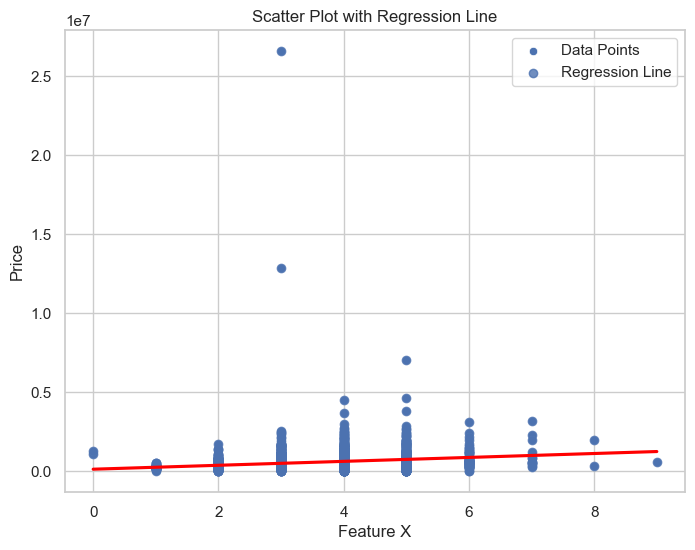

In [49]:
# 2.22

feature_X =  price_df['bedrooms']
price =  price_df['price']

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature_X, y=price, label='Data Points')

# Add a regression line
sns.regplot(x=feature_X, y=price, ci=None, label='Regression Line', line_kws={"color": "red"})

# Set labels and title
plt.xlabel('Feature X')
plt.ylabel('Price')
plt.title('Scatter Plot with Regression Line')

# Show the plot
plt.legend()
plt.show()